IA PER DETECTAR SI LA IMATGE D'UN USUARI ES UN GOS O UN GAS

In [1]:
# Importem les llibreries necessaries pel model de la IA. 
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
"""
Aquests son els DATASETS utilitzats per entrenar la IA. 

import kagglehub

# Dataset de animals que no son gossos ni gats
path = kagglehub.dataset_download("antobenedetti/animals")
# Descarguem el dataset amb fotos de gats i gossos.
path = kagglehub.dataset_download("chetankv/dogs-cats-images")


"""

'\nAquests son els DATASETS utilitzats per entrenar la IA. \n\nimport kagglehub\n\n# Dataset de animals que no son gossos ni gats\npath = kagglehub.dataset_download("antobenedetti/animals")\n# Descarguem el dataset amb fotos de gats i gossos.\npath = kagglehub.dataset_download("chetankv/dogs-cats-images")\n\n\n'

In [9]:
""" ImageDataGenerator s'utilitza per preprocessar imatges i
generar dades per entrenar la IA, a mes, es normalitza utilitzant
rescale. """

train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

In [10]:
""" Carreguem el directori de les imatges que s'utilitzaran per entrenar la IA, flow_from_directory serveix per carregar les imatges, 
aquestes estan en dues carpetes (una per si es gat o gos i l'altre totes les imatges que no ho son), per aixo la class_mode esta
posada en binary. """

path = 'dataset/training_set'
train_set = train_data.flow_from_directory(directory = path, target_size = (128,128), batch_size = 32, color_mode = "rgb", class_mode = 'binary')

Found 16136 images belonging to 2 classes.


In [11]:
""" Fem el mateix pel conjunt de testeig. """

t_path = 'dataset/test_set'
validation_set = test_data.flow_from_directory(directory = t_path, target_size = (128,128), batch_size = 30, shuffle = True, class_mode = 'binary', color_mode = "rgb")

Found 2000 images belonging to 1 classes.


In [12]:
""" Creem un model sequencial utilitzant una red neuronal convolucional. """

model = Sequential()

# Primera capa: convolucional amb 32 kernels amb filtres per treure les principals caracteristiques de les imatges. 
# MaxPooling2d pren les principales caracteristiques prenen un valor maxim de tots els blocs (2,2). 
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Segona capa: convolucional amb 64 kernels per treure mes caracteristiques que la primera.
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Tercera capa: agafa la capa 2D del segon MaxPooling2D i ho converteix a un vector 1D. 
model.add(Flatten())

# Quarta capa: el resultat es binari. 
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/home/uri/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-10 15:57:54.523400: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,765,505 (56.33 MB)

 Trainable params: 14,765,505 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
""" Configurem el model. """

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
""" Entrenem el model, amb 8 epochs l'error disminueix al minim. A partir d'aquest, el model nomes augmenta
la validesa molt poc. Per tant, ens quedem en 8 epoques."""

model_history=model.fit(train_set, validation_data = validation_set, epochs = 8)

/home/uri/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
505/505 ━━━━━━━━━━━━━━━━━━━━ 635s 1s/step - accuracy: 0.6796 - loss: 0.6982 - val_accuracy: 0.9215 - val_loss: 0.3044
Epoch 2/8
505/505 ━━━━━━━━━━━━━━━━━━━━ 660s 1s/step - accuracy: 0.8882 - loss: 0.2808 - val_accuracy: 0.8805 - val_loss: 0.3290
Epoch 3/8
505/505 ━━━━━━━━━━━━━━━━━━━━ 544s 1s/step - accuracy: 0.9337 - loss: 0.1721 - val_accuracy: 0.8135 - val_loss: 0.4670
Epoch 4/8
505/505 ━━━━━━━━━━━━━━━━━━━━ 535s 1s/step - accuracy: 0.9607 - loss: 0.1106 - val_accuracy: 0.9725 - val_loss: 0.0905
Epoch 5/8
505/505 ━━━━━━━━━━━━━━━━━━━━ 529s 1s/step - accuracy: 0.9771 - loss: 0.0611 - val_accuracy: 0.9340 - val_loss: 0.2329
Epoch 6/8
505/505 ━━━━━━━━━━━━━━━━━━━━ 488s 966ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.8860 - val_loss: 0.4474
Epoch 7/8
505/505 ━━━━━━━━━━━━━━━━━━━━ 511s 1s/step - accuracy: 0.9948 - loss: 0.0187 - val_accuracy: 0.9035 - val_loss: 0.4367
Epoch 8/8
505/505 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.9955 - loss: 0.0152 - val_accuracy:

In [16]:
model.save('IA_deteccion_perrosgatos.h5')

In [3]:
from tensorflow.keras.models import load_model
modelo = load_model('./IA_deteccion_perrosgatos.h5')

In [7]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,765,507 (56.33 MB)

 Trainable params: 14,765,505 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [9]:
import cv2
import numpy as np

image = cv2.imread("mascotas/gato_gafas.jpg")
image_r = cv2.resize(image, (126, 126))
image_n = image_r / 255.0
image_p = np.expand_dims(image_n, axis = 0)

prediccion = modelo.predict(image_p)

print(prediccion)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


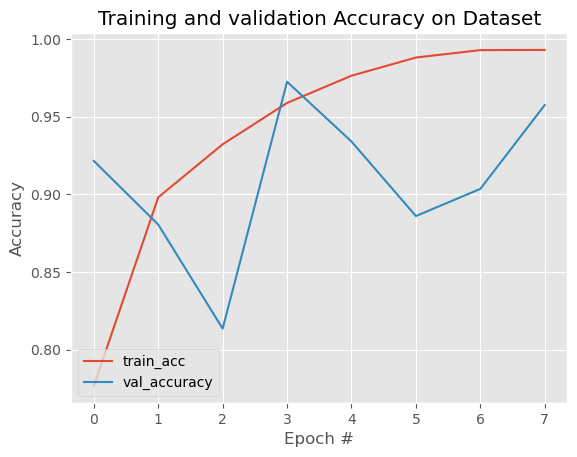

In [18]:
# Usar el historial de entrenamiento
H = model_history

# Obtener el número de épocas automáticamente
N = len(H.history["accuracy"])

# Usar el estilo "ggplot"
plt.style.use("ggplot")
plt.figure()

# Graficar la precisión de entrenamiento y validación
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")

# Título y etiquetas
plt.title("Training and validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

# Mostrar la gráfica
plt.show()


In [ ]:
""" Creem una funcio per tal de que la IA observi noves imatges i dedueixi si es valida (o be un gat  be un gos) 
o be no sigui valida. """

def testing_image(im):
    test_image = image.load_img(im, target_size = (128, 128))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    if result[0][0] == 0:
        return 'valid image'
    else:
        return 'no valid image'


In [41]:
""" Provem amb diverses imatges diferents de les quals hem entrenat. """
print(testing_image('cat.4017.jpg'))
print(testing_image('cat.4002.jpg'))
print(testing_image('cat.4003.jpg'))
print(testing_image('cat.4004.jpg'))
print(testing_image('cat.4005.jpg'))
print(testing_image('cat.4006.jpg'))
print(testing_image('cat.4007.jpg'))
print(testing_image('cat.4008.jpg'))
print(testing_image('cat.4009.jpg'))
print(testing_image('cat.4010.jpg'))
print(testing_image('cat.4011.jpg'))
print(testing_image('cat.4012.jpg'))
print(testing_image('cat.4004.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
no valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
no valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
no valid image


In [43]:
print(testing_image('dog.4567.jpg'))
print(testing_image('dog.4568.jpg'))
print(testing_image('dog.4569.jpg'))
print(testing_image('dog.4570.jpg'))
print(testing_image('dog.4571.jpg'))
print(testing_image('dog.4572.jpg'))
print(testing_image('dog.4573.jpg'))
print(testing_image('dog.4574.jpg'))
print(testing_image('dog.4575.jpg'))
print(testing_image('dog.4581.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
no valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
no valid image


In [54]:
print(testing_image('prove1.png'))
print(testing_image('persona.png'))
print(testing_image('hola3.jpg'))
print(testing_image('hola4.jpg'))
print(testing_image('prove5.png'))
print(testing_image('prove6.png'))
print(testing_image('prove7.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
no valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
no valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
no valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
valid image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
no valid image
